<a href="https://colab.research.google.com/github/Milechwan/if1015/blob/master/ProjetoIF1015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [0]:
import numpy as np
import pandas as pd
import io

dataset = pd.read_csv(io.StringIO(uploaded['googleplaystore.csv'].decode("ISO-8859-1")))

In [3]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


*Remoção de entradas duplicadas baseando-se apenas no nome dos aplicativos*

In [4]:
dataset.drop_duplicates(subset=['App'],keep='last', inplace=True)
print(len(dataset))

9660


In [5]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
dataset.Reviews.describe()

count     9660
unique    5333
top          0
freq       593
Name: Reviews, dtype: object

Baseando-se nos valores mostrados no .head(), pode-se inferir que essa coluna se trata da quantidade de resenhas (uma forma de avaliação que os usuários fazem para um aplicativo), portanto o tipo da coluna deve ser numérico, e não object.

In [7]:
dataset.Reviews = pd.to_numeric(dataset.Reviews)

ValueError: ignored

Faz-se a verificação dessa coluna com valor de string e que impediu a conversão para tipo numérico

In [8]:
dataset[dataset['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Aparentemente, a linha acima reflete uma entrada em que as informações estão nas colunas erradas. Ainda que isso fosse corrigido, não saberíamos sua categoria. Mais adiante, vemos que não há outras entradas além desta (caso fosse corrigida) sem a definição de categoria. Portanto, decidiu-se remover tal entrada.**

In [9]:
len(dataset[dataset['Category'].isna()])

0

In [10]:
dataset = dataset.drop(dataset[dataset['Price']=='Everyone'].index, axis = 0)
dataset.Reviews = pd.to_numeric(dataset.Reviews)
dataset.Reviews.describe()

count    9.659000e+03
mean     2.166512e+05
std      1.830738e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.690000e+02
75%      2.940100e+04
max      7.812821e+07
Name: Reviews, dtype: float64

In [11]:
dataset.Price.describe()

count     9659
unique      92
top          0
freq      8905
Name: Price, dtype: object

Vendo que a coluna de preço é de tipo objeto, faz-se uma verificação de como estão os dados de aplicativos pagos, ou seja, os que não são classificados na coluna Type como Free, que são 0

In [12]:
dataset[dataset['Type']!='Free']['Price']

290       $4.99
291       $4.99
427       $3.99
478       $1.49
479       $2.99
480       $3.99
481       $7.99
571       $3.99
851       $3.99
854       $3.99
995       $4.99
1001      $2.99
1227      $3.49
1228      $4.99
1335      $3.99
1341      $2.99
1347      $2.99
1832      $1.99
1833      $4.99
1834      $4.99
1835      $4.99
1836      $5.99
1837      $6.99
1838      $9.99
1839      $4.99
2062      $3.99
2085      $2.99
2086      $3.99
2087      $2.99
2150      $3.99
          ...  
10453     $2.99
10457     $2.99
10459     $1.99
10460     $1.00
10517     $1.49
10531     $3.49
10540     $2.99
10570     $1.99
10583     $6.99
10586     $0.99
10594     $1.99
10645     $8.99
10650     $5.49
10651     $6.49
10661     $5.99
10662     $6.49
10664     $6.49
10668     $6.49
10669     $5.99
10674     $5.49
10675     $0.99
10679     $2.99
10682     $0.99
10690     $0.99
10697     $0.99
10735     $0.99
10760     $7.99
10782    $16.99
10785     $1.20
10798     $1.04
Name: Price, Length: 755

**Remoção do símbolo $ para transformar o tipo da coluna Price em numérico**

In [13]:
dataset['Price'] = dataset['Price'].apply(lambda x: x[x.find('$')+1:] if x.find('$')>-1 else x)
dataset['Price'] = pd.to_numeric(dataset['Price'])
dataset.Price.describe()

count    9659.000000
mean        1.097231
std        16.851618
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [14]:
dataset[['Current Ver']].describe()

,Current Ver
count,9651
unique,2818
top,Varies with device
freq,1054


In [15]:
dataset[['Last Updated']].describe()

,Last Updated
count,9659
unique,1377
top,"August 3, 2018"
freq,252


Convertendo tipo da coluna 'Last Updated' para datetime

In [0]:
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'])

In [17]:
dataset['Last Updated'].describe()

count                    9659
unique                   1377
top       2018-08-03 00:00:00
freq                      252
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [18]:
dataset[['Android Ver']].describe()

,Android Ver
count,9657
unique,33
top,4.1 and up
freq,2206


In [19]:
dataset.Category.describe()

count       9659
unique        33
top       FAMILY
freq        1906
Name: Category, dtype: object

In [20]:
dataset.Rating.describe()

count    8196.000000
mean        4.173219
std         0.536269
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [21]:
dataset.Size.describe()

count                   9659
unique                   461
top       Varies with device
freq                    1227
Name: Size, dtype: object

In [22]:
dataset.Installs.describe()

count           9659
unique            21
top       1,000,000+
freq            1419
Name: Installs, dtype: object

In [23]:
dataset.Genres.describe()

count      9659
unique      118
top       Tools
freq        828
Name: Genres, dtype: object

**Para ver quão parecidas são as colunas Category e Genres entre si, é criado um dataframe contendo somente as duas colunas e são feitas as devidas modificações nas colunas para serem comparadas**

In [24]:
copy_dataset = dataset[['Category','Genres']]
copy_dataset.head()

,Category,Genres
0,ART_AND_DESIGN,Art & Design
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
5,ART_AND_DESIGN,Art & Design


In [25]:
copy_dataset['Category'] = copy_dataset['Category'].apply(lambda x: x.lower())
copy_dataset['Genres'] = copy_dataset['Genres'].apply(lambda x: x.lower())
copy_dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Category,Genres
0,art_and_design,art & design
2,art_and_design,art & design
3,art_and_design,art & design
4,art_and_design,art & design;creativity
5,art_and_design,art & design


In [26]:
copy_dataset['Category'] = copy_dataset['Category'].apply(lambda x: x[:x.index('_')]+' & '+x[x.rindex('_')+1:] if x.find('_and_')>-1 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
copy_dataset['Category'].head()

0    art & design
2    art & design
3    art & design
4    art & design
5    art & design
Name: Category, dtype: object

In [28]:
copy_dataset['eql'] = copy_dataset.apply(lambda x: x[0] in x[1], axis=1)
copy_dataset.eql.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    True
2    True
3    True
4    True
5    True
Name: eql, dtype: bool

In [29]:
copy_dataset.eql.describe()

count     9659
unique       2
top       True
freq      6664
Name: eql, dtype: object


A coluna criada acima com valores booleanos indica se a coluna Category está contida (ou é igual) à coluna Genres. Em porcentagem, vê-se que quase 69% das entradas estão contidas, o que possibilita a remoção da coluna Genres para uma interpretação mais prática dos dados.

In [30]:
print(6664*100/9659)

68.99264934258204


In [31]:
dataset = dataset.drop('Genres', axis = 1)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0.0,Everyone,2017-03-26,1.0,2.3 and up


**Verificando quais colunas possuem dados faltantes (NaN)**

In [32]:
dataset.columns[dataset.isna().any()].tolist()

['Rating', 'Type', 'Current Ver', 'Android Ver']

In [33]:
dataset[dataset['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,2018-06-28,Varies with device,Varies with device


In [34]:
#visto que há somente 1 ocorrência de Type como NaN, faz-se a alteração sabendo pelo print acima que Price=0
dataset['Type'] = dataset['Type'].apply(lambda x: 'Free' if (x!='Free' and x!='Paid') else x)
dataset.Type.describe()

count     9659
unique       2
top       Free
freq      8905
Name: Type, dtype: object

In [35]:
dataset[dataset['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0.00,Everyone 10+,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0.00,Everyone,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0.00,Teen,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0.00,Mature 17+,2017-08-08,2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0.00,Everyone 10+,2017-12-11,2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0.00,Mature 17+,2018-01-24,3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0.00,Everyone,2018-07-13,1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0.00,Everyone,2018-06-15,3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0.00,Everyone,2015-08-07,1.1,5.1 and up
227,Y! Mobile menu,BUSINESS,NaN,9,1.2M,"100,000+",Free,0.00,Everyone,2018-04-09,1.0.5,6.0 and up


In [36]:
dataset[dataset['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0.00,Everyone,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0.00,Everyone,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0.00,Everyone,2017-05-10,NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0.00,Everyone,2016-11-06,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,0.99,Everyone,2018-04-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0.00,Everyone,2017-04-03,NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,0.99,Everyone,2016-07-04,NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0.00,Everyone,2017-01-31,NaN,3.0 and up


In [37]:
dataset[dataset['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,1.49,Everyone,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0.00,Everyone,2018-03-27,1.1,NaN


**Transformando o tipo das colunas a seguir em categórico, de acordo com os resultados mostrados ao descrever cada uma delas** 

In [0]:
dataset['Type'] = dataset['Type'].astype("category")
dataset['Content Rating'] = dataset['Content Rating'].astype("category") 
dataset['Category'] = dataset['Category'].astype("category") 
dataset['Installs'] = dataset['Installs'].astype("category")
dataset['Android Ver'] = dataset['Android Ver'].astype("category")
dataset['Current Ver'] = dataset['Current Ver'].astype("category")
dataset['Size'] = dataset['Size'].astype("category")

In [0]:
#dicionarios para mapear as categorias com seus códigos para fazer teste de hipótese mais adiante
category_dict = dict(enumerate(dataset['Category'].cat.categories))
type_dict = dict(enumerate(dataset['Type'].cat.categories))
cont_rating_dict = dict(enumerate(dataset['Content Rating'].cat.categories))
installs_dict = dict(enumerate(dataset['Installs'].cat.categories))
android_ver_dict = dict(enumerate(dataset['Android Ver'].cat.categories))

In [0]:
dataset['Type'] = dataset['Type'].cat.codes
dataset['Content Rating'] = dataset['Content Rating'].cat.codes
dataset['Category'] = dataset['Category'].cat.codes
dataset['Installs'] = dataset['Installs'].cat.codes
dataset['Android Ver'] = dataset['Android Ver'].cat.codes
dataset['Current Ver'] = dataset['Current Ver'].cat.codes
dataset['Size'] = dataset['Size'].cat.codes

**Imputação de dados com KNN, visto que a coluna Ratings (nota de avaliação de um aplicativo) possui mais de 1400 entradas NaN**

In [42]:
from fancyimpute import KNN
dataset_knn = KNN(k=3).fit_transform(dataset[['Category','Rating','Type','Price','Installs','Reviews','Size','Content Rating','Current Ver','Android Ver']])


Using TensorFlow backend.


Imputing row 1/9659 with 0 missing, elapsed time: 15.918
Imputing row 101/9659 with 0 missing, elapsed time: 15.919
Imputing row 201/9659 with 0 missing, elapsed time: 15.920
Imputing row 301/9659 with 0 missing, elapsed time: 15.921
Imputing row 401/9659 with 0 missing, elapsed time: 15.922
Imputing row 501/9659 with 0 missing, elapsed time: 15.924
Imputing row 601/9659 with 0 missing, elapsed time: 15.925
Imputing row 701/9659 with 0 missing, elapsed time: 15.926
Imputing row 801/9659 with 0 missing, elapsed time: 15.927
Imputing row 901/9659 with 0 missing, elapsed time: 15.927
Imputing row 1001/9659 with 0 missing, elapsed time: 15.928
Imputing row 1101/9659 with 0 missing, elapsed time: 15.929
Imputing row 1201/9659 with 0 missing, elapsed time: 15.930
Imputing row 1301/9659 with 0 missing, elapsed time: 15.930
Imputing row 1401/9659 with 0 missing, elapsed time: 15.931
Imputing row 1501/9659 with 0 missing, elapsed time: 15.931
Imputing row 1601/9659 with 0 missing, elapsed time:

In [43]:
dataset_knn.shape

(9659, 10)

In [44]:
dataset_imput = pd.DataFrame(data=dataset_knn[0:,0:],columns=['Category','Rating','Type','Price','Installs','Reviews','Size','Content Rating','Current Ver','Android Ver'])
dataset_imput.head()


,Category,Rating,Type,Price,Installs,Reviews,Size,Content Rating,Current Ver,Android Ver
0,0.0,4.1,0.0,0.0,7.0,159.0,53.0,1.0,118.0,15.0
1,0.0,4.7,0.0,0.0,14.0,87510.0,366.0,1.0,462.0,15.0
2,0.0,4.5,0.0,0.0,17.0,215644.0,99.0,4.0,2751.0,18.0
3,0.0,4.3,0.0,0.0,10.0,967.0,62.0,1.0,277.0,20.0
4,0.0,4.4,0.0,0.0,16.0,167.0,220.0,1.0,113.0,8.0


Verificação de média e mediana de cada coluna para saber se é necessário normalizar

In [46]:
print('Reviews',str(dataset_imput.Reviews.mean()),str(dataset_imput.Reviews.median()))
print('Rating',str(dataset_imput.Rating.mean()),str(dataset_imput.Rating.median()))
print('Price',str(dataset_imput.Price.mean()),str(dataset_imput.Price.median()))


Reviews 216651.2178279325 969.0
Rating 4.167823442120077 4.3
Price 1.097230562169985 0.0


In [47]:
#normalização de coluna reviews

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
dataset_imput['ReviewsNorm'] = scaler.fit_transform(dataset_imput[['Reviews']])
print('Reviews',str(dataset_imput['ReviewsNorm'].mean()),str(dataset_imput['ReviewsNorm'].median()))

Reviews 0.0027730217212704506 1.2402690715752754e-05


# Remoção de outliers

Univariado - Tukey: Remover outliers baseando-se nas notas

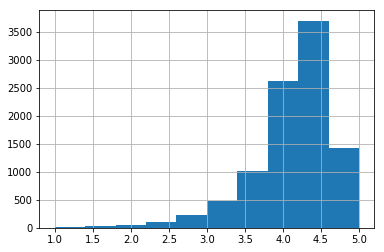

In [48]:
dataset_imput['Rating'].hist()

In [49]:
dataset_imput['RatingLog'] = np.log2(dataset_imput['Rating'])
dataset_imput['RatingLog'].describe()

count    9659.000000
mean        2.042980
std         0.233504
min         0.000000
25%         1.995683
50%         2.104337
75%         2.169925
max         2.321928
Name: RatingLog, dtype: float64

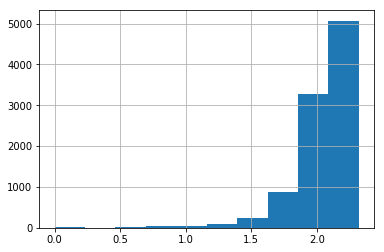

In [50]:
dataset_imput['RatingLog'].hist()

In [51]:
q1 = dataset_imput['RatingLog'].quantile(q=0.25)
q3 = dataset_imput['RatingLog'].quantile(q=0.75)
iqr = q3 - q1
dataset_imput2 = dataset_imput[(dataset_imput['RatingLog'] > (q1-1.5*iqr)) & (dataset_imput['RatingLog'] < (q3+1.5*iqr))]
print(len(dataset_imput2))

8910


Univariado - Tukey e Z-Score para remoção baseando-se na coluna de preço

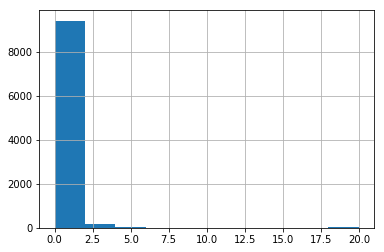

In [52]:
dataset_imput['PriceSqrt'] = np.sqrt(dataset_imput['Price'])
dataset_imput['PriceSqrt'].hist()

In [53]:
dataset_imput['PriceSqrt'].describe()

count    9659.000000
mean        0.184262
std         1.031207
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: PriceSqrt, dtype: float64

In [54]:
q1 = dataset_imput['PriceSqrt'].quantile(q=0.25)
q3 = dataset_imput['PriceSqrt'].quantile(q=0.75)
iqr = q3 - q1
dataset_imput3 = dataset_imput[(dataset_imput['PriceSqrt'] > (q1-1.5*iqr)) & (dataset_imput['PriceSqrt'] < (q3+1.5*iqr))]
print(len(dataset_imput3))

0


Visto que através do método de Tukey todo o dataset foi removido, aplica-se o z-score robusto

In [55]:
mad = dataset_imput['PriceSqrt'].mad()
dataset_imput3 = dataset_imput[abs(dataset_imput['PriceSqrt']-dataset_imput['PriceSqrt'].median())/mad < 3.5]
print(len(dataset_imput3))

9057


Bivariado: Z-score robusto. Será usada a razão de preço pela nota (colunas Price e Rating)

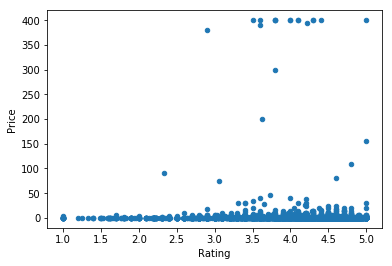

In [56]:
dataset_imput.plot.scatter(x='Rating',y='Price')

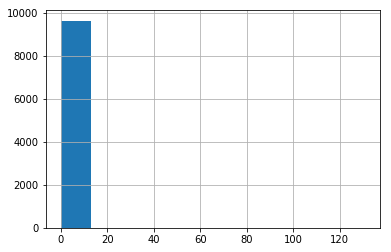

In [57]:
dataset_imput['PriceRating'] = dataset_imput['Price']/dataset_imput['Rating']
dataset_imput['PriceRating'].hist()

In [59]:
dataset_imput['PriceRatingSqrt'] = np.sqrt(dataset_imput['PriceRating'])
dataset_imput['PriceRatingSqrt'].describe()

count    9659.000000
mean        0.091141
std         0.519079
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.446879
Name: PriceRatingSqrt, dtype: float64

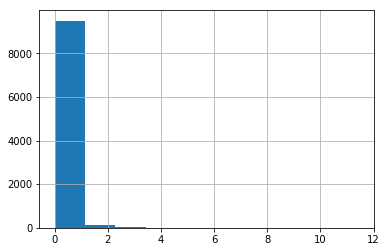

In [60]:
dataset_imput['PriceRatingSqrt'].hist()

In [61]:
mad = dataset_imput['PriceRatingSqrt'].mad()
dataset_imput4 = dataset_imput[abs(dataset_imput['PriceRatingSqrt']-dataset_imput['PriceRatingSqrt'].median())/mad < 3.5]
print(len(dataset_imput4))

9077


Bivariado - Valor normalizado de quantidade de resenhaas pelas notas (ReviewsNorm/Rating)

In [62]:
dataset_imput['ReviewsNormPerRateSqrt'] = np.sqrt(dataset_imput['ReviewsNorm']/dataset_imput['Rating'])
dataset_imput['ReviewsNormPerRateSqrt'].describe()

count    9659.000000
mean        0.009712
std         0.023173
min         0.000000
25%         0.000284
50%         0.001753
75%         0.009484
max         0.493865
Name: ReviewsNormPerRateSqrt, dtype: float64

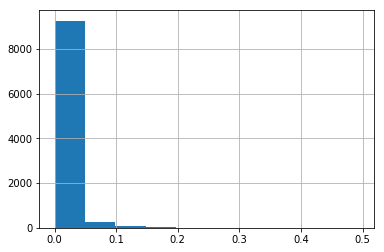

In [63]:
dataset_imput['ReviewsNormPerRateSqrt'].hist()

In [64]:
q1 = dataset_imput['ReviewsNormPerRateSqrt'].quantile(q=0.25)
q3 = dataset_imput['ReviewsNormPerRateSqrt'].quantile(q=0.75)
iqr = q3 - q1
dataset_imput5 = dataset_imput[(dataset_imput['ReviewsNormPerRateSqrt'] > (q1-1.5*iqr)) & (dataset_imput['ReviewsNormPerRateSqrt'] < (q3+1.5*iqr))]
print(len(dataset_imput5))

8584


Multivariado - Isolation Forest

In [65]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
dtset = dataset_imput[['Category','Rating','Type','Price','Installs','Reviews','Size','Content Rating','Current Ver','Android Ver']]
clf.fit(dtset)

#scores = clf.predict(dataset_imput)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x7f7dcbe40e58>,
        verbose=0)

In [66]:
scores = clf.predict(dtset)
dtset['outlier'] = scores
dtset.outlier.describe()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    9659.000000
mean        0.799979
std         0.600059
min        -1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: outlier, dtype: float64

In [67]:
len(dtset[dtset['outlier']!=1])

966

In [0]:
dtset = dtset[dtset['outlier']!=1]

Multivariado - Local Outlier Factor

In [0]:

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.1)

In [77]:
scores = clf.fit_predict(dataset_imput[['Category','Rating','Type','Price','Installs','Reviews','Size','Content Rating','Current Ver','Android Ver']])
dataset_imput['outlier'] = scores
dataset_imput6 = dataset_imput[dataset_imput['outlier']<1]
print(len(dataset_imput6))

966


# Análise descritiva

Utilizando dataset após remoção de outliers baseando-se em quantidade de resenhas dividido pela nota (ReviewsNorm/Rating)

In [70]:
#Correlação
dataset_imput5.corr(method='spearman')

,Category,Rating,Type,Price,Installs,Reviews,Size,Content Rating,Current Ver,Android Ver,ReviewsNorm,RatingLog,PriceSqrt,PriceRating,PriceRatingSqrt,ReviewsNormPerRateSqrt
Category,1.000000,-0.045678,0.021097,0.019658,-0.007867,0.045859,-0.026135,-0.110066,0.079086,0.079313,0.045859,-0.045678,0.019658,0.019646,0.019646,0.047975
Rating,-0.045678,1.000000,0.058659,0.057121,-0.015427,0.003246,-0.011182,-0.022217,-0.056529,0.029210,0.003246,1.000000,0.057121,0.054450,0.054450,-0.027330
Type,0.021097,0.058659,1.000000,0.998624,-0.042746,-0.117272,-0.005094,-0.029294,-0.035536,-0.092705,-0.117272,0.058659,0.998624,0.998605,0.998605,-0.119861
Price,0.019658,0.057121,0.998624,1.000000,-0.043119,-0.115566,-0.004844,-0.028423,-0.033570,-0.092101,-0.115566,0.057121,1.000000,0.999937,0.999937,-0.118115
Installs,-0.007867,-0.015427,-0.042746,-0.043119,1.000000,0.057455,0.010602,0.018877,0.025705,0.007741,0.057455,-0.015427,-0.043119,-0.043192,-0.043192,0.057188
Reviews,0.045859,0.003246,-0.117272,-0.115566,0.057455,1.000000,0.210783,0.124217,0.367599,0.134718,1.000000,0.003246,-0.115566,-0.116081,-0.116081,0.999230
Size,-0.026135,-0.011182,-0.005094,-0.004844,0.010602,0.210783,1.000000,0.050144,0.242861,0.223340,0.210783,-0.011182,-0.004844,-0.004966,-0.004966,0.210825
Content Rating,-0.110066,-0.022217,-0.029294,-0.028423,0.018877,0.124217,0.050144,1.000000,-0.011115,-0.012937,0.124217,-0.022217,-0.028423,-0.028655,-0.028655,0.124083
Current Ver,0.079086,-0.056529,-0.035536,-0.033570,0.025705,0.367599,0.242861,-0.011115,1.000000,0.313457,0.367599,-0.056529,-0.033570,-0.033798,-0.033798,0.368646
Android Ver,0.079313,0.029210,-0.092705,-0.092101,0.007741,0.134718,0.223340,-0.012937,0.313457,1.000000,0.134718,0.029210,-0.092101,-0.092422,-0.092422,0.135019


Média, mediana e moda dos valores para cada dataset após remoção de outliers

In [85]:
print('Rating',dataset_imput2['Reviews'].mean(),dataset_imput2['Reviews'].median(),dataset_imput2['Reviews'].mode())
print('Price',dataset_imput3['Reviews'].mean(),dataset_imput3['Reviews'].median(),dataset_imput3['Reviews'].mode())
print('Price / Rating',dataset_imput4['Reviews'].mean(),dataset_imput4['Reviews'].median(),dataset_imput4['Reviews'].mode())
print('ReviewsNorm / Rating',dataset_imput5['Reviews'].mean(),dataset_imput5['Reviews'].median(),dataset_imput5['Reviews'].mode())
print('Local Outlier Factor',dataset_imput6['Reviews'].mean(),dataset_imput6['Reviews'].median(),dataset_imput6['Reviews'].mode())
print('Isolation Forest',dtset['Reviews'].mean(),dtset['Reviews'].median(),dtset['Reviews'].mode())

Rating 234580.80650953983 1546.0 0    0.0
dtype: float64
Price 230427.18836259248 1218.0 0    0.0
dtype: float64
Price / Rating 229922.5819103228 1211.0 0    0.0
dtype: float64
ReviewsNorm / Rating 14802.241379310344 438.0 0    0.0
dtype: float64
Local Outlier Factor 740136.9482401656 47.0 0    0.0
dtype: float64
Isolation Forest 1516923.0082815734 4495.0 0    0.0
dtype: float64


In [84]:
print('Rating',dataset_imput2['Rating'].mean(),dataset_imput2['Rating'].median(),dataset_imput2['Rating'].mode())
print('Price',dataset_imput3['Rating'].mean(),dataset_imput3['Rating'].median(),dataset_imput3['Rating'].mode())
print('Price / Rating',dataset_imput4['Rating'].mean(),dataset_imput4['Rating'].median(),dataset_imput4['Rating'].mode())
print('ReviewsNorm / Rating',dataset_imput5['Rating'].mean(),dataset_imput5['Rating'].median(),dataset_imput5['Rating'].mode())
print('Local Outlier Factor',dataset_imput6['Rating'].mean(),dataset_imput6['Rating'].median(),dataset_imput6['Rating'].mode())
print('Isolation Forest',dtset['Rating'].mean(),dtset['Rating'].median(),dtset['Rating'].mode())

Rating 4.283678763789409 4.3 0    4.3
dtype: float64
Price 4.1644674757468 4.3 0    4.3
dtype: float64
Price / Rating 4.166255059577442 4.3 0    4.3
dtype: float64
ReviewsNorm / Rating 4.141461629477853 4.202553602792044 0    4.3
dtype: float64
Local Outlier Factor 4.0671188919677075 4.2 0    4.4
dtype: float64
Isolation Forest 4.216270085101617 4.4 0    4.4
dtype: float64


In [83]:

print('Rating',dataset_imput2['Price'].mean(),dataset_imput2['Price'].median(),dataset_imput2['Price'].mode())
print('Price',dataset_imput3['Price'].mean(),dataset_imput3['Price'].median(),dataset_imput3['Price'].mode())
print('Price / Rating',dataset_imput4['Price'].mean(),dataset_imput4['Price'].median(),dataset_imput4['Price'].mode())
print('ReviewsNorm / Rating',dataset_imput5['Price'].mean(),dataset_imput5['Price'].median(),dataset_imput5['Price'].mode())
print('Local Outlier Factor',dataset_imput6['Price'].mean(),dataset_imput6['Price'].median(),dataset_imput6['Price'].mode())
print('Isolation Forest',dtset['Price'].mean(),dtset['Price'].median(),dtset['Price'].mode())

Rating 1.102970819304141 0.0 0    0.0
dtype: float64
Price 0.016709727282764698 0.0 0    0.0
dtype: float64
Price / Rating 0.020121185413682945 0.0 0    0.0
dtype: float64
ReviewsNorm / Rating 1.2328960857409 0.0 0    0.0
dtype: float64
Local Outlier Factor 8.408002070393357 0.0 0    0.0
dtype: float64
Isolation Forest 10.552950310558925 1.0 0    0.0
dtype: float64


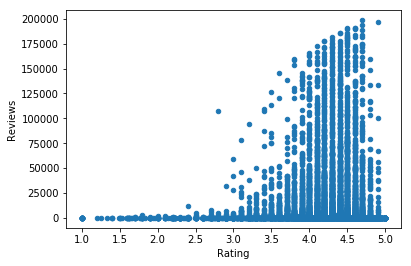

In [86]:
dataset_imput5.plot.scatter(x='Rating',y='Reviews')

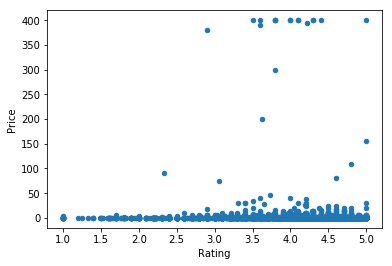

In [87]:
dataset_imput5.plot.scatter(x='Rating',y='Price')

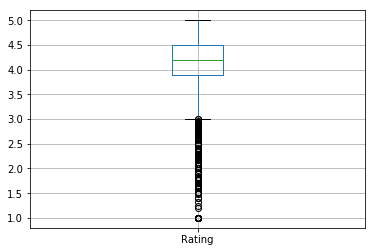

In [88]:
dataset_imput5.boxplot(column=['Rating'])

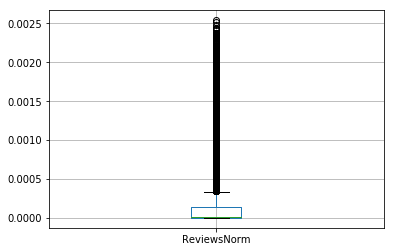

In [89]:
dataset_imput5.boxplot(column=['ReviewsNorm'])

# Testes de hipótese e visualizações


In [0]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

1) Há diferença entre a média da quantidade de resenhas de aplicativos pagos e gratuitos (relação entre as colunas Reviews e Type)

In [92]:
dataset_imput3.groupby('Type')['Type'].count()

Type
0.0    8905
1.0     152
Name: Type, dtype: int64

In [93]:
type_dict

{0: 'Free', 1: 'Paid'}

In [94]:
dataset_imput3.groupby('Category')['Category'].count()

Category
0.0       58
1.0       82
2.0       53
3.0      198
4.0      408
5.0       56
6.0      296
7.0      165
8.0      100
9.0       77
10.0      63
11.0    1751
12.0     328
13.0     110
14.0     869
15.0     273
16.0      73
17.0      84
18.0     352
19.0     128
20.0     325
21.0     253
22.0      58
23.0     332
24.0     262
25.0     352
26.0     200
27.0     238
28.0     307
29.0     768
30.0     207
31.0     160
32.0      71
Name: Category, dtype: int64

In [95]:
category_dict

{0: 'ART_AND_DESIGN',
 1: 'AUTO_AND_VEHICLES',
 2: 'BEAUTY',
 3: 'BOOKS_AND_REFERENCE',
 4: 'BUSINESS',
 5: 'COMICS',
 6: 'COMMUNICATION',
 7: 'DATING',
 8: 'EDUCATION',
 9: 'ENTERTAINMENT',
 10: 'EVENTS',
 11: 'FAMILY',
 12: 'FINANCE',
 13: 'FOOD_AND_DRINK',
 14: 'GAME',
 15: 'HEALTH_AND_FITNESS',
 16: 'HOUSE_AND_HOME',
 17: 'LIBRARIES_AND_DEMO',
 18: 'LIFESTYLE',
 19: 'MAPS_AND_NAVIGATION',
 20: 'MEDICAL',
 21: 'NEWS_AND_MAGAZINES',
 22: 'PARENTING',
 23: 'PERSONALIZATION',
 24: 'PHOTOGRAPHY',
 25: 'PRODUCTIVITY',
 26: 'SHOPPING',
 27: 'SOCIAL',
 28: 'SPORTS',
 29: 'TOOLS',
 30: 'TRAVEL_AND_LOCAL',
 31: 'VIDEO_PLAYERS',
 32: 'WEATHER'}

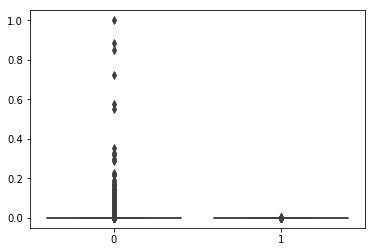

In [96]:
reviews_freeapps = dataset_imput3[dataset_imput3['Type']==0]['ReviewsNorm']
reviews_paidapps = dataset_imput3[dataset_imput3['Type']==1]['ReviewsNorm']

sns.boxplot(data=[reviews_freeapps,reviews_paidapps])

In [97]:
stats.mannwhitneyu(reviews_freeapps,reviews_paidapps)

MannwhitneyuResult(statistic=372874.0, pvalue=9.636282838544592e-22)

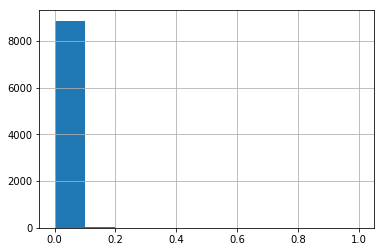

In [98]:
reviews_freeapps.hist()

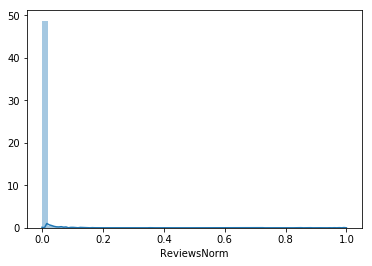

In [99]:
sns.distplot(reviews_freeapps)

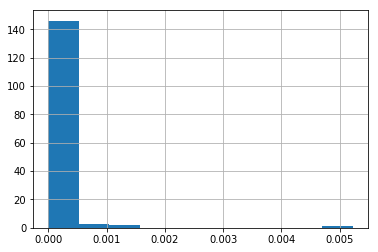

In [100]:
reviews_paidapps.hist()

In [0]:
reviews_paidapps.describe()

count    1.520000e+02
mean     7.912921e-05
std      4.533385e-04
min      0.000000e+00
25%      3.839842e-08
50%      2.751887e-07
75%      3.020676e-06
max      5.225923e-03
Name: ReviewsNorm, dtype: float64

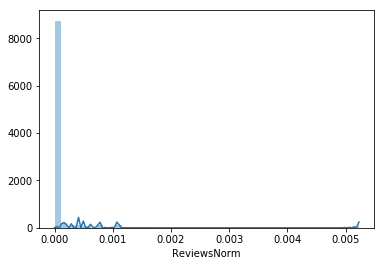

In [103]:
sns.distplot(reviews_paidapps)

In [104]:
reviews_freeapps.describe()

count    8.905000e+03
mean     2.998339e-03
std      2.438884e-02
min      0.000000e+00
25%      3.711848e-07
50%      1.752248e-05
75%      4.501831e-04
max      1.000000e+00
Name: ReviewsNorm, dtype: float64

2) Há diferenças nas médias das notas dadas pelos aplicativos gratuitos e pelos pagos

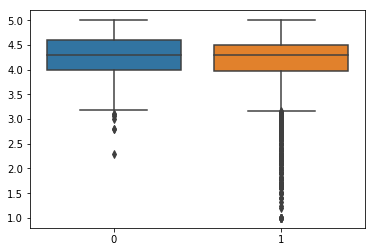

In [105]:
rating_freeapps = dataset_imput3[dataset_imput3['Type']==0]['Rating']
rating_paidapps = dataset_imput3[dataset_imput3['Type']==1]['Rating']

sns.boxplot(data=[rating_paidapps,rating_freeapps])

In [106]:
stats.mannwhitneyu(rating_freeapps,rating_paidapps)

MannwhitneyuResult(statistic=598633.0, pvalue=0.007150302070849847)

Realizando esse mesmo teste de hipótese antes da remoção dos outliers

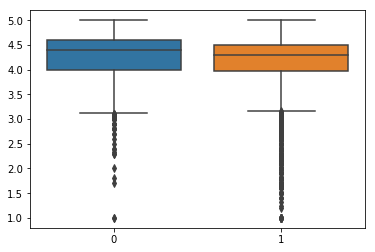

In [107]:
rating_freeapps_olddata = dataset_imput[dataset_imput['Type']==0]['Rating']
rating_paidapps_olddata = dataset_imput[dataset_imput['Type']==1]['Rating']

sns.boxplot(data=[rating_paidapps_olddata,rating_freeapps_olddata])

In [108]:
stats.mannwhitneyu(rating_freeapps_olddata,rating_paidapps_olddata)

MannwhitneyuResult(statistic=3035012.5, pvalue=5.65025177614113e-06)

In [109]:
cont_rating_dict

{0: 'Adults only 18+',
 1: 'Everyone',
 2: 'Everyone 10+',
 3: 'Mature 17+',
 4: 'Teen',
 5: 'Unrated'}

In [110]:
dataset_imput3.groupby('Content Rating')['Content Rating'].count()

Content Rating
0.0       3
1.0    7382
2.0     297
3.0     380
4.0     993
5.0       2
Name: Content Rating, dtype: int64

3) Aplicativos de classificação indicativa livre possui média de quantidade de resenhas maior do que a de aplicativos para público adolescente

In [0]:
everyone_reviews = dataset_imput3[dataset_imput3['Content Rating']==1]['ReviewsNorm']
teen_reviews = dataset_imput3[dataset_imput3['Content Rating']==4]['ReviewsNorm']

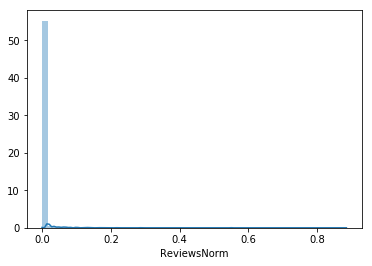

In [113]:
sns.distplot(everyone_reviews)

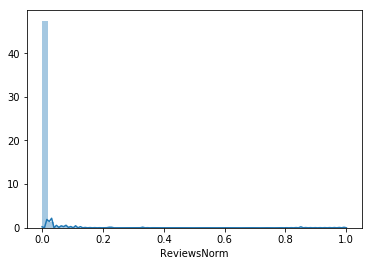

In [114]:
sns.distplot(teen_reviews)

In [115]:
stats.mannwhitneyu(teen_reviews,everyone_reviews)

MannwhitneyuResult(statistic=2810790.0, pvalue=3.4107022833142825e-33)

In [116]:
everyone_reviews.describe()

count    7.382000e+03
mean     2.252178e-03
std      1.863419e-02
min      0.000000e+00
25%      2.687890e-07
50%      8.902034e-06
75%      3.107040e-04
max      8.845675e-01
Name: ReviewsNorm, dtype: float64

In [117]:
teen_reviews.describe()

count    993.000000
mean       0.006479
std        0.045576
min        0.000000
25%        0.000002
50%        0.000143
75%        0.001661
max        1.000000
Name: ReviewsNorm, dtype: float64

4)Aplicativos de jogos possuem média de quantidade de resenhas maior do que a dos aplicativos de ferramentas

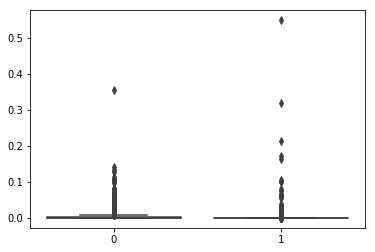

In [118]:
tools_reviews = dataset_imput4[dataset_imput4['Category']==29]['ReviewsNorm']
game_reviews = dataset_imput4[dataset_imput4['Category']==14]['ReviewsNorm']

sns.boxplot(data=[game_reviews,tools_reviews])

In [119]:
stats.mannwhitneyu(game_reviews,tools_reviews)

MannwhitneyuResult(statistic=205025.5, pvalue=2.8295383789686107e-42)

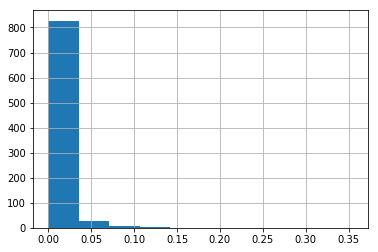

In [120]:
game_reviews.hist()

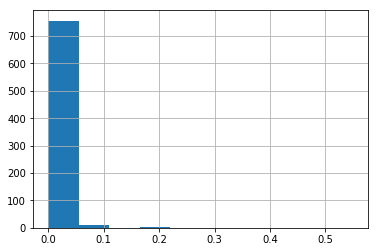

In [121]:
tools_reviews.hist()

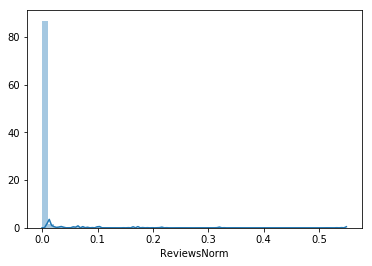

In [122]:
sns.distplot(tools_reviews)

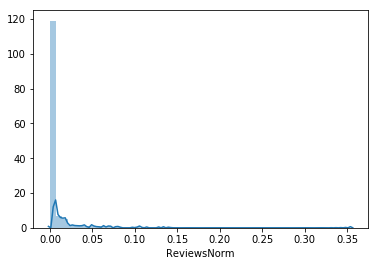

In [123]:
sns.distplot(game_reviews)

In [124]:
game_reviews.describe()

count    870.000000
mean       0.006242
std        0.020178
min        0.000000
25%        0.000017
50%        0.000377
75%        0.003103
max        0.354695
Name: ReviewsNorm, dtype: float64

In [125]:
tools_reviews.describe()

count    7.700000e+02
mean     3.810990e-03
std      2.714697e-02
min      0.000000e+00
25%      3.711848e-07
50%      6.892517e-06
75%      3.080130e-04
max      5.493090e-01
Name: ReviewsNorm, dtype: float64

5)Aplicativos de categoria Lifestyle são mais caros que os de categoria Família

In [0]:
price_lifestyle = dataset_imput3[dataset_imput3['Category']==18]['Price']
price_family = dataset_imput3[dataset_imput3['Category']==11]['Price']


In [128]:
stats.mannwhitneyu(price_lifestyle,price_family)

MannwhitneyuResult(statistic=304644.0, pvalue=0.054553639390834255)

In [129]:
price_lifestyle.describe()

count    352.000000
mean       0.005625
std        0.074518
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.990000
Name: Price, dtype: float64

In [130]:
price_family.describe()

count    1751.000000
mean        0.017264
std         0.131040
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.260000
Name: Price, dtype: float64

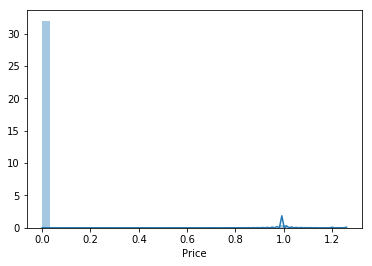

In [131]:
sns.distplot(price_family)

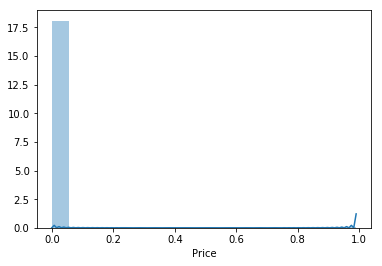

In [132]:
sns.distplot(price_lifestyle)

In [133]:
installs_dict

{0: '0',
 1: '0+',
 2: '1+',
 3: '1,000+',
 4: '1,000,000+',
 5: '1,000,000,000+',
 6: '10+',
 7: '10,000+',
 8: '10,000,000+',
 9: '100+',
 10: '100,000+',
 11: '100,000,000+',
 12: '5+',
 13: '5,000+',
 14: '5,000,000+',
 15: '50+',
 16: '50,000+',
 17: '50,000,000+',
 18: '500+',
 19: '500,000+',
 20: '500,000,000+'}

In [134]:
dataset_imput3.groupby('Installs')['Installs'].count()

Installs
0.0        1
1.0        4
2.0       54
3.0      776
4.0     1407
5.0       20
6.0      339
7.0      930
8.0      932
9.0      639
10.0    1037
11.0     189
12.0      75
13.0     416
14.0     607
15.0     179
16.0     432
17.0     204
18.0     298
19.0     494
20.0      24
Name: Installs, dtype: int64

5) Aplicativos com mais de 1 milhão de instalações possuem média de preço menor dos que os aplicativos com mais de 100 mil instalações

In [0]:
price_100k = dataset_imput3[dataset_imput3['Installs']==10]['Price']
price_1m = dataset_imput3[dataset_imput3['Installs']==4]['Price']

In [136]:
price_1m.describe()

count    1407.000000
mean        0.005629
std         0.074465
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.990000
Name: Price, dtype: float64

In [137]:
price_100k.describe()

count    1037.000000
mean        0.004773
std         0.068611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.990000
Name: Price, dtype: float64

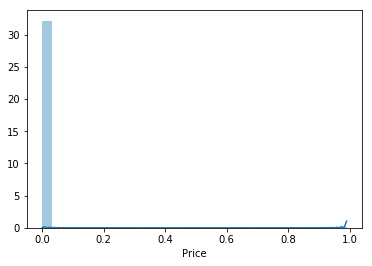

In [138]:
sns.distplot(price_100k)

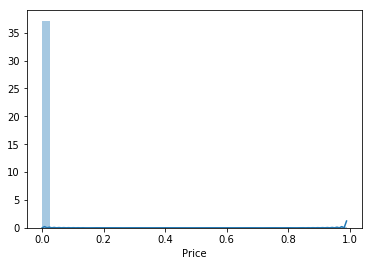

In [139]:
sns.distplot(price_1m)

In [140]:
stats.mannwhitneyu(price_100k,price_1m)

MannwhitneyuResult(statistic=728899.0, pvalue=0.38589951116218396)

6)Os aplicativos com mais de 1 bilhão de instalações são mais bem avaliados do que os com mais de 500 milhões de instalações

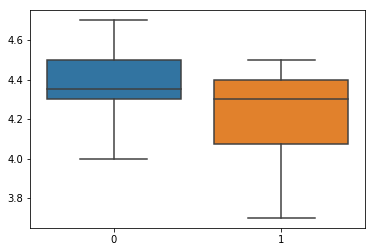

In [141]:
rating_1bi = dataset_imput3[dataset_imput3['Installs']==5]['Rating']
rating_500mi = dataset_imput3[dataset_imput3['Installs']==20]['Rating']

sns.boxplot(data=[rating_500mi,rating_1bi])

In [142]:
stats.mannwhitneyu(rating_500mi,rating_1bi)

MannwhitneyuResult(statistic=149.5, pvalue=0.015614882662046171)

In [143]:
rating_1bi.describe()

count    20.000000
mean      4.215000
std       0.225424
min       3.700000
25%       4.075000
50%       4.300000
75%       4.400000
max       4.500000
Name: Rating, dtype: float64

In [144]:
rating_500mi.describe()

count    24.000000
mean      4.375000
std       0.177544
min       4.000000
25%       4.300000
50%       4.350000
75%       4.500000
max       4.700000
Name: Rating, dtype: float64

In [145]:
android_ver_dict

{0: '1.0 and up',
 1: '1.5 and up',
 2: '1.6 and up',
 3: '2.0 and up',
 4: '2.0.1 and up',
 5: '2.1 and up',
 6: '2.2 - 7.1.1',
 7: '2.2 and up',
 8: '2.3 and up',
 9: '2.3.3 and up',
 10: '3.0 and up',
 11: '3.1 and up',
 12: '3.2 and up',
 13: '4.0 and up',
 14: '4.0.3 - 7.1.1',
 15: '4.0.3 and up',
 16: '4.1 - 7.1.1',
 17: '4.1 and up',
 18: '4.2 and up',
 19: '4.3 and up',
 20: '4.4 and up',
 21: '4.4W and up',
 22: '5.0 - 6.0',
 23: '5.0 - 7.1.1',
 24: '5.0 - 8.0',
 25: '5.0 and up',
 26: '5.1 and up',
 27: '6.0 and up',
 28: '7.0 - 7.1.1',
 29: '7.0 and up',
 30: '7.1 and up',
 31: '8.0 and up',
 32: 'Varies with device'}

In [146]:
dataset_imput3.groupby('Android Ver')['Android Ver'].count()

Android Ver
-1.0        1
 0.0        2
 1.0       14
 2.0       82
 3.0       30
 4.0        3
 5.0      116
 6.0        1
 7.0      200
 8.0      561
 9.0      251
 10.0     207
 11.0      10
 12.0      29
 13.0    1199
 14.0       2
 15.0    1329
 16.0       1
 17.0    2116
 18.0     355
 19.0     211
 20.0     788
 21.0       9
 22.0       1
 23.0       1
 24.0       2
 25.0     493
 26.0      20
 27.0      50
 28.0       1
 29.0      33
 30.0       3
 31.0       5
 32.0     931
Name: Android Ver, dtype: int64

7)Aplicativos compatíveis com Android 4.4 em diante possuem média de preço diferente dos aplicativos compatíveis a partir do Android 5.0

In [0]:
android44_price = dataset_imput3[dataset_imput3['Android Ver']==20]['Price']
android5_price = dataset_imput3[dataset_imput3['Android Ver']==25]['Price']

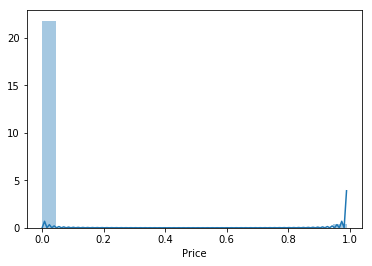

In [148]:
sns.distplot(android5_price)

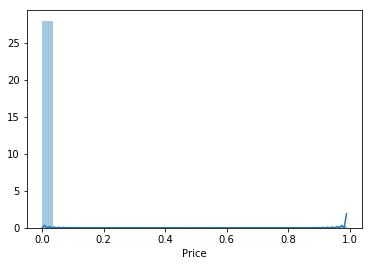

In [149]:
sns.distplot(android44_price)

In [150]:
stats.mannwhitneyu(android44_price,android5_price)

MannwhitneyuResult(statistic=192421.5, pvalue=0.07096559978658082)

In [151]:
android5_price.describe()

count    493.000000
mean       0.018073
std        0.132670
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.990000
Name: Price, dtype: float64

In [153]:
android44_price.describe()

count    788.000000
mean       0.008794
std        0.092952
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.990000
Name: Price, dtype: float64